# Dataset Description

CRIM: Per capita crime rate by town.
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
INDUS: Proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
NOX: Nitric oxides concentration (parts per 10 million).
RM: Average number of rooms per dwelling.
AGE: Proportion of owner-occupied units built prior to 1940.
DIS: Weighted distances to five Boston employment centers.
RAD: Index of accessibility to radial highways.
TAX: Full-value property tax rate per $10,000.
PTRATIO: Pupil-teacher ratio by town.
B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
LSTAT: Percentage of lower status of the population.
MEDV: Median value of owner-occupied homes in $1000s (this is the target variable)

In [1465]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [1466]:
df=pd.read_csv("HousingData.csv")

In [1467]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [1468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [1469]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

---------------------------------------------------------------------------------------------------------------

In [1470]:
df=df.fillna(df.mean)

In [1471]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [1472]:
print(X)

        CRIM    ZN  INDUS CHAS    NOX     RM  \
0    0.00632  18.0   2.31  0.0  0.538  6.575   
1    0.02731   0.0   7.07  0.0  0.469  6.421   
2    0.02729   0.0   7.07  0.0  0.469  7.185   
3    0.03237   0.0   2.18  0.0  0.458  6.998   
4    0.06905   0.0   2.18  0.0  0.458  7.147   
..       ...   ...    ...  ...    ...    ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593   
502  0.04527   0.0  11.93  0.0  0.573  6.120   
503  0.06076   0.0  11.93  0.0  0.573  6.976   
504  0.10959   0.0  11.93  0.0  0.573  6.794   
505  0.04741   0.0  11.93  0.0  0.573  6.030   

                                                   AGE     DIS  RAD  TAX  \
0                                                 65.2  4.0900    1  296   
1                                                 78.9  4.9671    2  242   
2                                                 61.1  4.9671    2  242   
3                                                 45.8  6.0622    3  222   
4                                          

In [1473]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [1474]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

In [1475]:
X_test=X_test.apply(pd.to_numeric,errors='coerce')

In [1476]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [1477]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)


In [1478]:
Lr=LinearRegression()

In [1479]:
len(X_train)

354

In [1480]:
print(X_train)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
5     0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622   3.0  222.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
45    0.17142   0.0   6.91   0.0  0.448  5.682  33.8  5.1004   3.0  233.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935  29.3  4.4986   4.0  307.0   
468  15.57570   0.0  18.10   0.0  0.580  5.926  71.0  2.9084  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
106   0.17120   0.0   8.56   0.0  0.520  5.836  91.9  2.2110   5.0  384.0   
270   0.29916  20.0   6.96   0.0  0.464  5.856  42.1  4.4290   3.0  223.0   
348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.520  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  
5       18.7  394.12   5.21  
116     17.8  3

In [1481]:
X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_test=X_test.dropna()
y_test=y_test[X_test.index]

In [1482]:
print(y_train)

5      28.7
45     19.3
16     23.1
468    19.1
360    25.0
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 267, dtype: float64


In [1483]:
len(y_train)

267

In [1484]:
Lr.fit(X_train,y_train)

LinearRegression()

In [1485]:
pred=Lr.predict(X_test)

In [1486]:
print(len(pred))

127


In [1487]:
#Checking Accuracy Score 
print('Test Score',Lr.score(X_test,y_test))
print('Train Score',Lr.score(X_train,y_train))

Test Score 0.7197008120278565
Train Score 0.7786240464453613


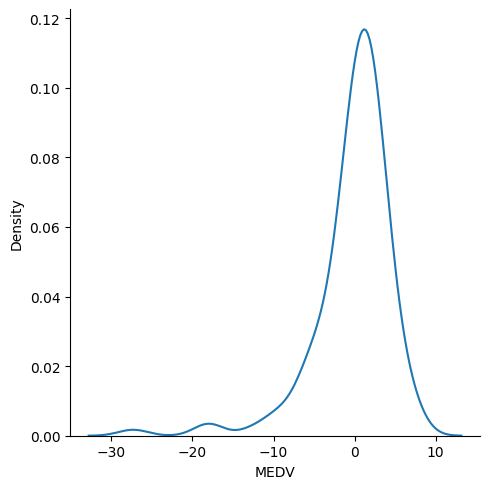

In [1488]:
import seaborn as sns
sns.displot(pred-y_test, kind = 'kde')

In [1489]:
from sklearn.metrics import r2_score
score = r2_score(pred, y_test)
score

0.6603974893117284

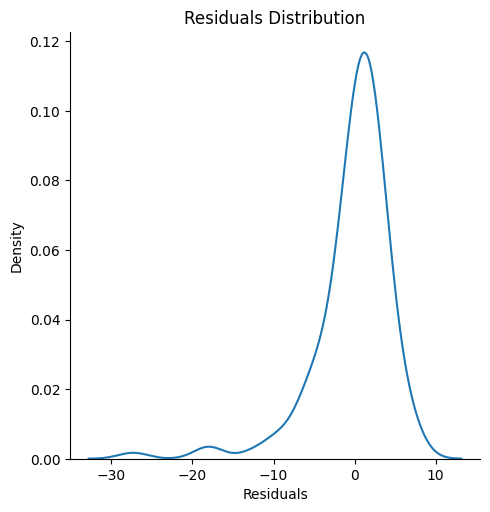

In [1490]:
# Plot residuals
sns.displot(pred - y_test, kind='kde')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

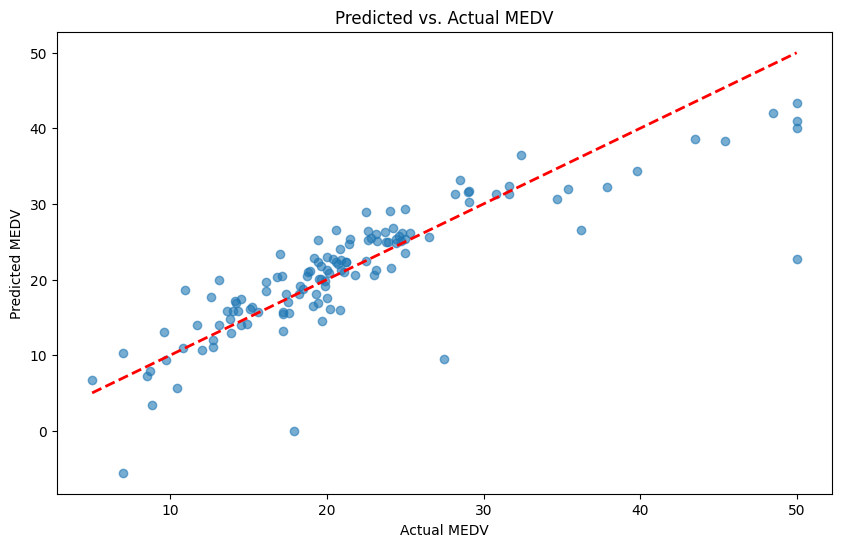

In [1491]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Predicted vs. Actual MEDV')
plt.show()